In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import StockHistory
import seaborn as sns

In [2]:
names = StockHistory.get_namad_list()

In [6]:
sec_data = pd.DataFrame()
asset =0
for n in names.head(10)["NAMAD"]:
    d = StockHistory.get_namad_history_by_name(n,start_date='1397-1-1',from_cache=True)["ClosePrice"]
    if len(d) > 240:
        asset+=1
        sec_data[n] = d
sec_data

,تملي612,فسا,فرآور,سبزوا,وبملت,لپيام,ثنام
GDATE,,,,,,,
2018-03-25,661034.0,602.0,14971.0,1299.0,1003.0,1415.0,1335.0
2018-03-26,661034.0,607.0,15603.0,1299.0,1000.0,1415.0,1311.0
2018-03-27,661034.0,646.0,16370.0,1299.0,999.0,1415.0,1293.0
2018-03-28,661034.0,682.0,15942.0,1299.0,994.0,1415.0,1282.0
2018-04-03,661034.0,656.0,16055.0,1299.0,994.0,1415.0,1269.0
2018-04-04,661034.0,633.0,15827.0,1299.0,989.0,1415.0,1249.0
2018-04-07,661034.0,640.0,15237.0,1299.0,987.0,1415.0,1249.0
2018-04-08,661034.0,615.0,15185.0,1299.0,981.0,1415.0,1214.0
2018-04-09,661034.0,614.0,15851.0,1299.0,950.0,1550.0,1174.0


In [50]:
# (sec_data / sec_data.iloc[0] * 100).plot (figsize = (10,6))
# asset

In [7]:
log_returns = np.log(sec_data / sec_data.shift(1))

Text(0, 0.5, 'Expected return')

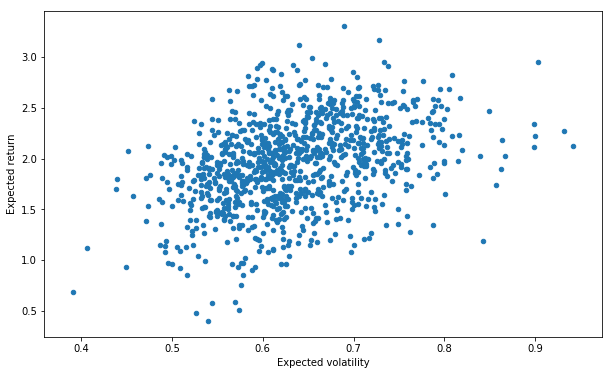

In [8]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(1000):
    wights = np.random.random(asset)
    wights /= np.sum(wights)
    ret = np.sum(wights * log_returns.mean()) * 1000
    pfolio_returns.append(ret)
    vol = np.sqrt(np.dot(wights.T,np.dot(log_returns.cov() * 1000,wights)))
    pfolio_volatilities.append(vol)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolios = pd.DataFrame({'returns' : pfolio_returns,'volatility' : pfolio_volatilities})
pfolios.plot(x='volatility',y='returns',kind = 'scatter',figsize=(10,6))
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')